In [129]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib.font_manager

In [5]:
path= 'c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2'

In [6]:
with open(path+'/CJ_DATA.bin', 'rb') as f:
    cj = pickle.load(f)

with open(path+'/GS_DATA.bin', 'rb') as f:
    gs = pickle.load(f)
    
with open(path+'/SH_DATA.bin', 'rb') as f:
    sh = pickle.load(f)
    
with open(path+'/SK_DATA.bin', 'rb') as f:
    sk = pickle.load(f)
    
with open(path+'/WS_DATA.bin', 'rb') as f:
    ws = pickle.load(f)

In [7]:
print(cj.keys())
print('-'*80)
print(gs.keys())
print('-'*80)
print(sh.keys())
print('-'*80)
print(sk.keys())
print('-'*80)
print(ws.keys())

dict_keys(['CJ_DATA', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['GS_TOTAL', 'GS_CATEGORY', 'GS_DONG', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['SH_RESIDENT', 'SH_FOREIGN', 'INDUSTRY_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['SK_AGE', 'SK_TIME', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
--------------------------------------------------------------------------------
dict_keys(['WS_MENTION', 'WS_SENTIMENT', 'WS_TOPIC', 'COL_CHANGE_DICT', 'INDUSTRY_CODE_DICT', 'GEO_CODE_DICT'])


In [8]:
# cj data
cj_data= cj['CJ_DATA']

# gs data
gs_total_data= gs['GS_TOTAL']
gs_category_data= gs['GS_CATEGORY']
gs_dong_data= gs['GS_DONG']

# sh data
sh_resident_data= sh['SH_RESIDENT']
sh_foreign_data= sh['SH_FOREIGN']

# sk data
sk_age_data= sk['SK_AGE']
sk_time_data= sk['SK_TIME']

# ws data
ws_mention_data= ws['WS_MENTION']
ws_sentiment_data= ws['WS_SENTIMENT']
ws_topic_data= ws['WS_TOPIC']

# 시각화 설정

In [237]:
# plt 폰트 설정
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

# seaborn 폰트 설정
sns.set(style= 'whitegrid', rc= {'figure.figsize': (10,10)},
       font= font_name)

# CJ DATA

In [169]:
cj_data.DATE = cj_data.DATE.astype('str')

In [240]:
cj_data.columns

Index(['DATE', 'YEAR', 'MONTH', 'DAY', 'ITEM_CODE', 'SI_CODE', 'SI_NM',
       'GU_CODE', 'GU_NM', 'DONG_CODE', 'DONG_NM', 'TRANSIT_COUNT',
       'TOTAL_CODE'],
      dtype='object')

In [207]:
cj_data_YM = pd.DataFrame.copy(cj_data)

In [209]:
cj_data_YM.YEAR= cj_data_YM.YEAR.astype('str')
cj_data_YM.MONTH= cj_data_YM.MONTH.astype('str')

In [214]:
cj_data_YM['YM']= cj_data_YM.YEAR + cj_data_YM.MONTH

In [225]:
cj_groupby= cj_data_YM.groupby(['YM','GU_NM'])
cj_groupby_cnt_data= cj_groupby.count().unstack()['TRANSIT_COUNT']

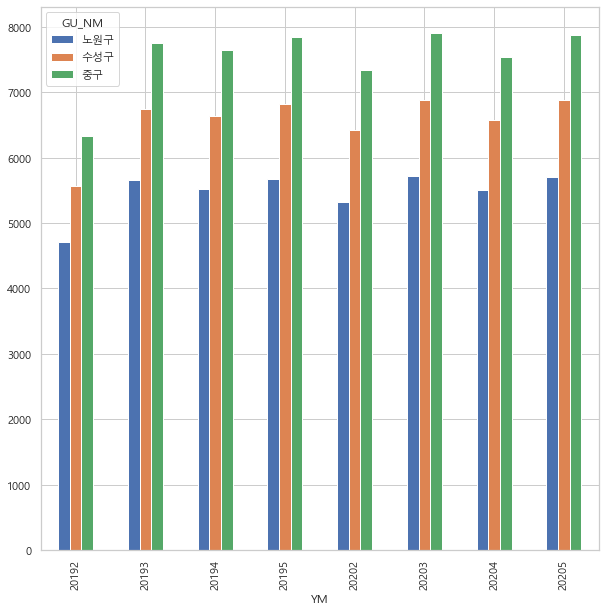

In [238]:
# MONTH별 구 별 TRANSIT_COUNT의 분포
cj_groupby_cnt_data.plot.bar()

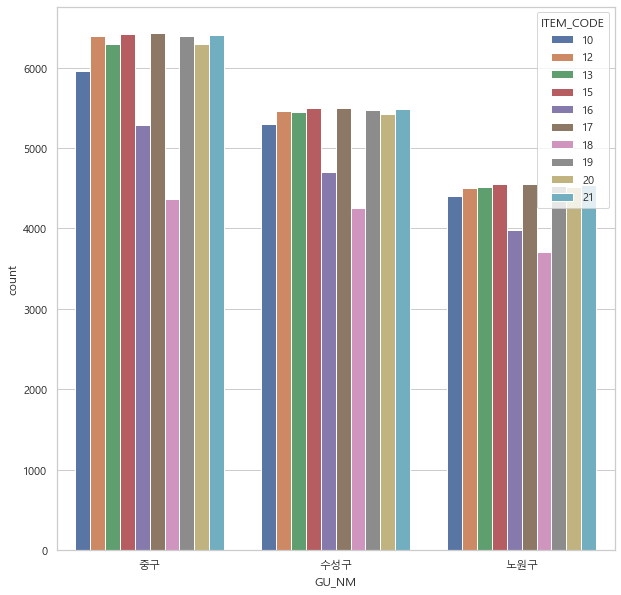

In [239]:
# 구 별 ITEM_CODE 분포
sns.countplot(x= 'GU_NM',hue= 'ITEM_CODE',data= cj_data, orient= 'h')

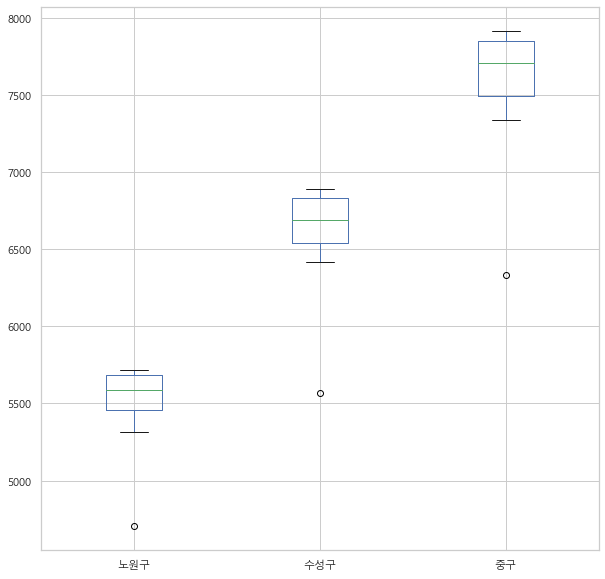

In [246]:
# 구별 transit_count boxplot
cj_groupby_cnt_data.plot.box()

# GS DATA

In [251]:
gs_total_data.columns

Index(['DATE', 'YEAR', 'MONTH', 'DAY', 'SI_NM', 'GU_NM', 'DONG_NM', 'AMT_IND',
       'LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P',
       'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 'SI_CODE', 'GU_CODE',
       'DONG_CODE', 'TOTAL_CODE'],
      dtype='object')

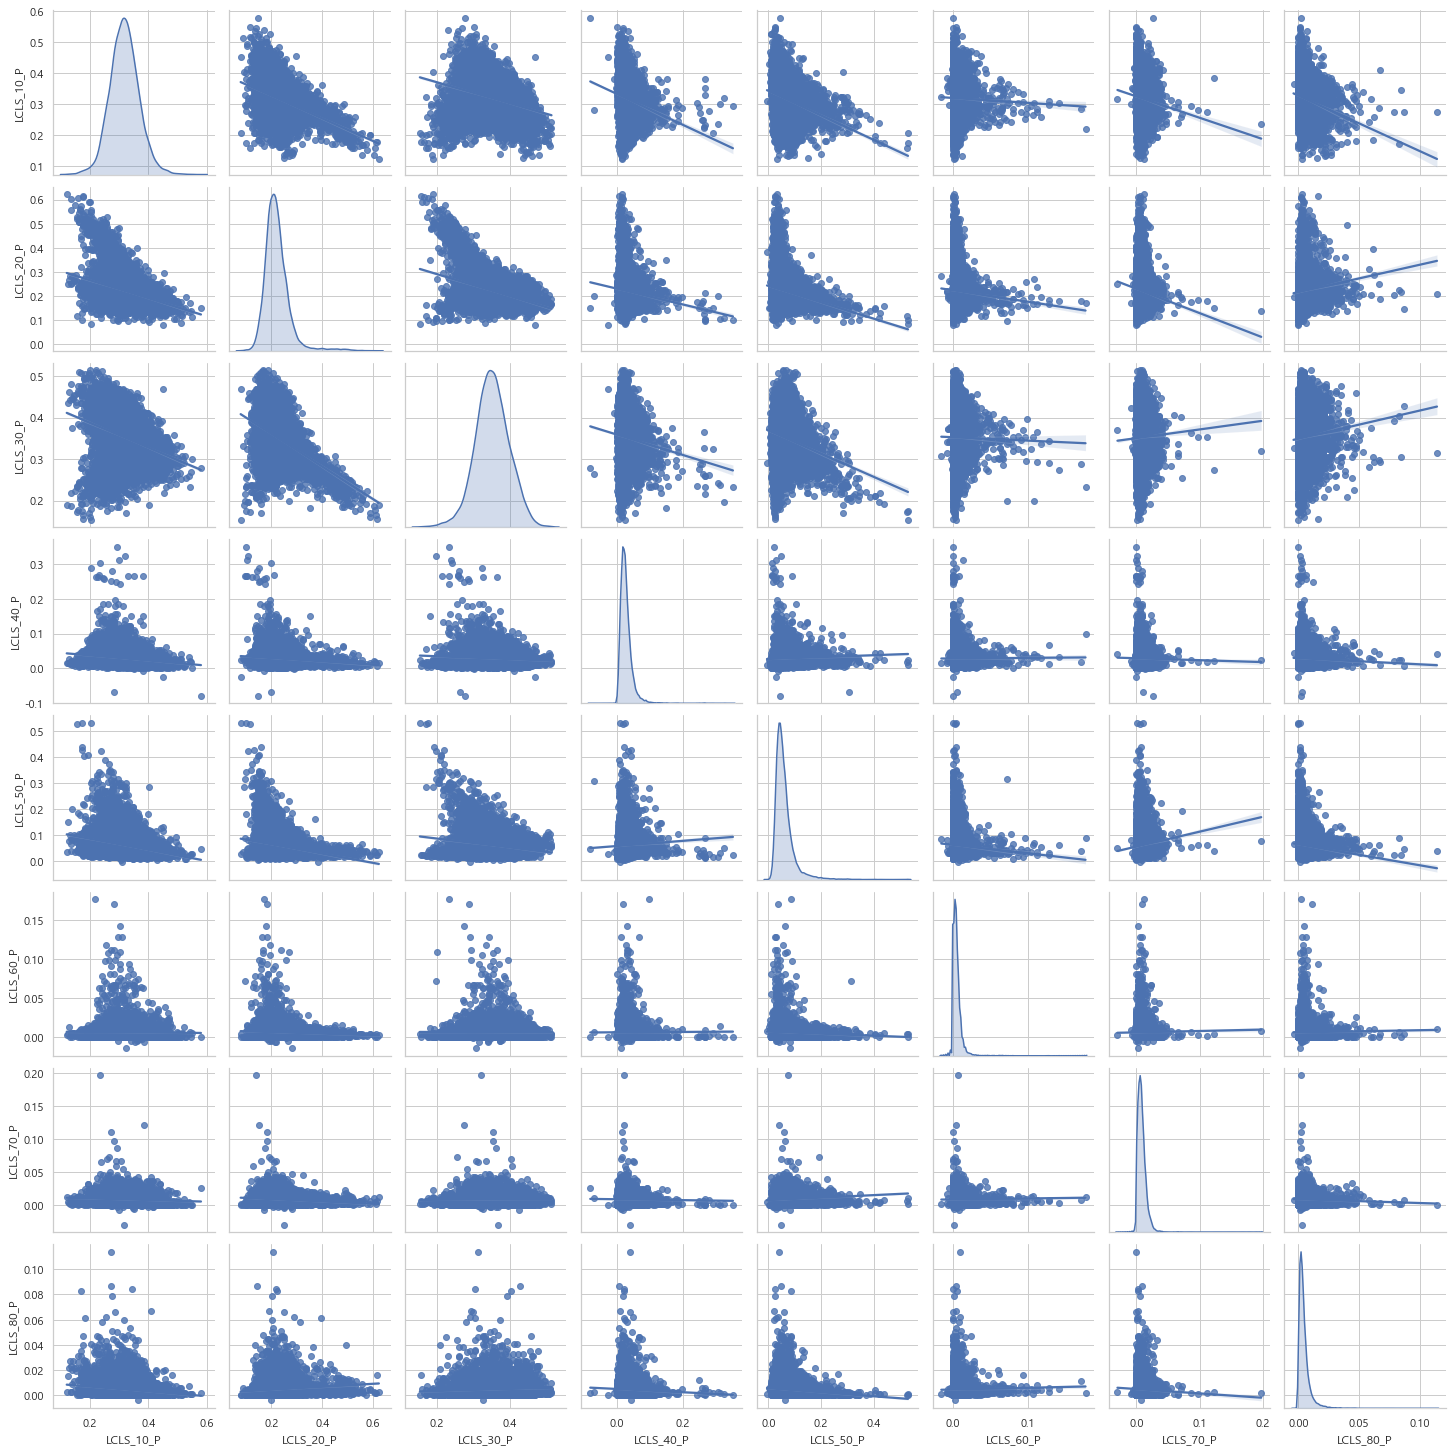

In [253]:
sns.pairplot(gs_total_data.iloc[:,8:16], kind= 'reg', diag_kind= 'kde')

In [256]:
gs_total_data.iloc[:,8:10]

,LCLS_10_P,LCLS_20_P
0,0.451,0.172
1,0.458,0.196
2,0.360,0.197
3,0.282,0.175
4,0.401,0.200
...,...,...
14455,0.314,0.221
14456,0.276,0.221
14457,0.303,0.188
14458,0.265,0.257


In [259]:
gs_total_data.columns

Index(['DATE', 'YEAR', 'MONTH', 'DAY', 'SI_NM', 'GU_NM', 'DONG_NM', 'AMT_IND',
       'LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P',
       'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 'SI_CODE', 'GU_CODE',
       'DONG_CODE', 'TOTAL_CODE'],
      dtype='object')

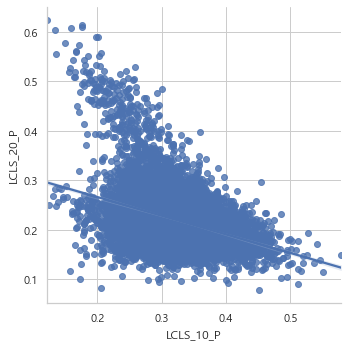

In [261]:
sns.lmplot(x= 'LCLS_10_P', y= 'LCLS_20_P', data= gs_total_data )